In [2]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from scipy.stats import kstest
from scipy.stats import spearmanr

In [3]:
eth_4h = pd.read_csv("ETHUSDT-4h-2020-2024.csv",delimiter=';')

In [4]:
#change timestamp into datetime
def timestamp_to_datetime(timestamp:list)->list:
    datetime = []
    for i in timestamp:
        datetime.append(dt.fromtimestamp(int(i)/1000))
    return datetime

eth_4h['open_time'] = timestamp_to_datetime(eth_4h['open_time'])
eth_4h['close_time'] = timestamp_to_datetime(eth_4h['close_time'])

In [5]:
eth_4h.tail()

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore
10382,2024-09-30 11:00:00,2628.64,2642.99,2621.81,2636.70,258982.869,2024-09-30 14:59:59.999,6.821363e+08,360528,137356.722,3.618291e+08,0
10383,2024-09-30 15:00:00,2636.70,2642.48,2590.72,2627.97,683349.428,2024-09-30 18:59:59.999,1.788853e+09,782211,334382.805,8.755135e+08,0
10384,2024-09-30 19:00:00,2627.97,2638.15,2592.05,2595.05,429091.015,2024-09-30 22:59:59.999,1.123442e+09,613753,199132.875,5.215090e+08,0
10385,2024-09-30 23:00:00,2595.05,2609.44,2572.82,2594.49,488562.373,2024-10-01 02:59:59.999,1.267736e+09,644795,241391.344,6.265518e+08,0
10386,2024-10-01 03:00:00,2594.50,2616.86,2575.54,2601.49,343586.791,2024-10-01 06:59:59.999,8.936541e+08,498133,172148.092,4.477334e+08,0


In [6]:
log_ret = (np.log(eth_4h.close) - np.log(eth_4h.close.shift(1)))[1:]

In [7]:
#kolmogorov-smirnov test
kstest(log_ret,"norm")

KstestResult(statistic=0.47118659742005786, pvalue=0.0, statistic_location=0.05584191309408748, statistic_sign=1)

In [8]:
# tidak normal

In [9]:
def lag_logret(close:list[float],lag_n:int)->pd.DataFrame:
    log_ret = (np.log(close) - np.log(close.shift(1)))[1:]

    df = pd.DataFrame()
    for i in range(1,lag_n+1):
        df[f'D{i}'] = list(log_ret[i-1:].values)+[np.nan]*(i-1)
    return df

In [10]:
lag_logret(eth_4h.close,42).iloc[:42,:42].corr(method='spearman')

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D33,D34,D35,D36,D37,D38,D39,D40,D41,D42
D1,1.000000,-0.203954,0.038976,-0.174945,-0.117413,0.082246,-0.042379,0.045296,0.093266,-0.241553,...,0.016449,0.008994,0.212219,-0.038976,0.083705,-0.067823,-0.242039,0.273155,0.114983,-0.027307
D2,-0.203954,1.000000,-0.210113,0.073657,-0.120493,-0.152095,0.106393,-0.047241,0.074143,0.079005,...,0.016125,0.014667,-0.000081,0.192124,-0.087432,0.083543,-0.105259,-0.265862,0.228426,0.110283
D3,0.038976,-0.210113,1.000000,-0.210437,0.075115,-0.117576,-0.137833,0.107204,-0.036221,0.075440,...,-0.347865,0.037193,0.004133,-0.013694,0.196662,-0.086460,0.077546,-0.098938,-0.287578,0.230208
D4,-0.174945,0.073657,-0.210437,1.000000,-0.139292,0.047727,-0.071712,-0.138806,0.128434,-0.040921,...,0.158577,-0.338951,0.003160,-0.051292,-0.049834,0.199417,-0.132323,0.056154,-0.194555,-0.268617
D5,-0.117413,-0.120493,0.075115,-0.139292,1.000000,-0.201523,0.074953,-0.071550,-0.078357,0.116279,...,-0.052913,0.134268,-0.343489,-0.001378,-0.125517,-0.068309,0.134430,-0.201037,-0.003160,-0.191151
D6,0.082246,-0.152095,-0.117576,0.047727,-0.201523,1.000000,-0.271372,0.091970,-0.106069,-0.078843,...,0.214164,-0.072360,0.177700,-0.299246,0.045296,-0.138968,-0.022932,0.153877,-0.099263,-0.012236
D7,-0.042379,0.106393,-0.137833,-0.071712,0.074953,-0.271372,1.000000,-0.267158,0.127947,-0.096183,...,-0.004619,0.168463,-0.053075,0.223402,-0.346730,0.012236,-0.167490,-0.109310,0.159063,-0.122762
D8,0.045296,-0.047241,0.107204,-0.138806,-0.071550,0.091970,-0.267158,1.000000,-0.258245,0.132161,...,-0.157281,0.006239,0.163439,-0.062799,0.226967,-0.350620,0.015639,-0.159063,-0.112390,0.158253
D9,0.093266,0.074143,-0.036221,0.128434,-0.078357,-0.106069,0.127947,-0.258245,1.000000,-0.266996,...,0.045134,-0.160846,-0.005429,0.135564,-0.113524,0.227129,-0.377360,-0.014342,-0.216919,-0.096021
D10,-0.241553,0.079005,0.075440,-0.040921,0.116279,-0.078843,-0.096183,0.132161,-0.266996,1.000000,...,-0.033790,0.042703,-0.164735,-0.010453,0.138481,-0.114658,0.226319,-0.365692,-0.015639,-0.216271


In [22]:
lag_logret(eth_4h.close,42).corr(method='spearman')

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D33,D34,D35,D36,D37,D38,D39,D40,D41,D42
D1,1.000000,-0.060067,-0.001014,0.004374,0.006517,-0.006185,-0.069698,0.010199,0.005769,0.024932,...,-0.009079,0.001246,0.021967,0.016462,0.023490,-0.011958,0.009940,0.009349,-0.007095,0.006755
D2,-0.060067,1.000000,-0.060068,-0.001019,0.004376,0.006521,-0.006180,-0.069701,0.010198,0.005769,...,-0.025157,-0.009074,0.001241,0.021964,0.016467,0.023493,-0.011955,0.009949,0.009342,-0.007092
D3,-0.001014,-0.060068,1.000000,-0.060125,-0.001005,0.004425,0.006576,-0.006190,-0.069712,0.010201,...,0.004779,-0.025108,-0.009119,0.001173,0.021995,0.016505,0.023506,-0.011888,0.009875,0.009364
D4,0.004374,-0.001019,-0.060125,1.000000,-0.060098,-0.000900,0.004548,0.006556,-0.006213,-0.069711,...,0.012467,0.004894,-0.025208,-0.009266,0.001238,0.022072,0.016528,0.023665,-0.012052,0.009921
D5,0.006517,0.004376,-0.001005,-0.060098,1.000000,-0.060133,-0.000932,0.004554,0.006561,-0.006213,...,-0.000427,0.012437,0.004916,-0.025173,-0.009282,0.001222,0.022067,0.016493,0.023707,-0.012061
D6,-0.006185,0.006521,0.004425,-0.000900,-0.060133,1.000000,-0.060265,-0.000909,0.004577,0.006561,...,-0.005722,-0.000537,0.012532,0.005063,-0.025237,-0.009355,0.001197,0.021918,0.016653,0.023667
D7,-0.069698,-0.006180,0.006576,0.004548,-0.000932,-0.060265,1.000000,-0.060241,-0.000883,0.004573,...,-0.012113,-0.005848,-0.000428,0.012697,0.004993,-0.025323,-0.009383,0.001023,0.022102,0.016605
D8,0.010199,-0.069701,-0.006190,0.006556,0.004554,-0.000909,-0.060241,1.000000,-0.060242,-0.000880,...,0.013490,-0.012095,-0.005866,-0.000454,0.012708,0.005005,-0.025316,-0.009358,0.000995,0.022110
D9,0.005769,0.010198,-0.069712,-0.006213,0.006561,0.004577,-0.000883,-0.060242,1.000000,-0.060236,...,-0.023374,0.013513,-0.012116,-0.005894,-0.000443,0.012721,0.005009,-0.025291,-0.009388,0.001003
D10,0.024932,0.005769,0.010201,-0.069711,-0.006213,0.006561,0.004573,-0.000880,-0.060236,1.000000,...,0.021680,-0.023381,0.013515,-0.012112,-0.005898,-0.000447,0.012721,0.005003,-0.025285,-0.009390


In [12]:
for i in range(1,42):
    result = spearmanr(lag_logret(eth_4h.close,42).values[0],lag_logret(eth_4h.close,42).values[i])
    if result[1] < 0.05:
        print(f'p-val of spearman correlation between D1 and D{i+1}', result[1])
        print('')


p-val of spearman correlation between D1 and D31 0.036008118260386614



# Finding Outliers Date

In [13]:
log_ret_df = pd.DataFrame({'log_ret':log_ret.values},index=eth_4h.open_time[1:])
log_ret_df

,log_ret
open_time,
2020-01-01 11:00:00,0.000615
2020-01-01 15:00:00,0.003604
2020-01-01 19:00:00,0.010129
2020-01-01 23:00:00,-0.001365
2020-01-02 03:00:00,-0.008917
...,...
2024-09-30 11:00:00,0.003062
2024-09-30 15:00:00,-0.003316
2024-09-30 19:00:00,-0.012606


In [14]:
log_ret_df = pd.DataFrame({'log_ret':log_ret.values},index=eth_4h.open_time[1:])
def find_outliers(df:pd.DataFrame,k=1.5)->pd.DataFrame:
    Q1 = np.quantile(log_ret_df.log_ret,0.25)
    Q3 = np.quantile(log_ret_df.log_ret,0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - k*IQR
    upper_bound = Q3 + k*IQR

    print("normal range is between",lower_bound,"and",upper_bound)
    return df.loc[(df.log_ret < lower_bound) | (df.log_ret > upper_bound)]

find_outliers(log_ret_df,k=1.5)


normal range is between -0.02662828141598883 and 0.027709176126614388


,log_ret
open_time,
2020-01-06 07:00:00,0.029703
2020-01-10 19:00:00,0.029136
2020-01-12 03:00:00,-0.026951
2020-01-14 07:00:00,0.036718
2020-01-14 19:00:00,0.029255
...,...
2024-09-02 15:00:00,0.030200
2024-09-06 19:00:00,-0.035677
2024-09-06 23:00:00,-0.029937


In [15]:
log_ret_df.shape

(10386, 1)

In [16]:
1005/10386

0.09676487579433853

In [ ]:
winsorizing

log_ret :
kurtosis
skewness

cek apakah tanggal outliers dekat2 atau nggak

In [18]:
import matplotlib.pyplot as plt

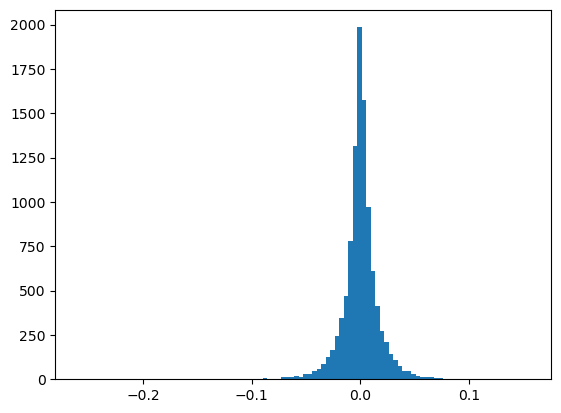

In [53]:
plt.hist(log_ret_df,bins=100)
plt.show()

In [23]:
import yfinance as yf

In [47]:
close_daily = yf.download(['ETH-USD']).loc['2020-1-1':'2024-10-1'].Close

[*********************100%%**********************]  1 of 1 completed


In [48]:
log_ret_daily = np.log(close_daily) - np.log(close_daily.shift(1))
log_ret_daily = log_ret_daily[1:]

In [64]:
log_ret_2day = []

for i in range(0,log_ret_daily.shape[0],2):
    log_ret_2day.append(log_ret_daily[i])

/var/folders/_8/r2326rms4l37yskjs2yv3mv80000gn/T/ipykernel_6563/2868508894.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  log_ret_2day.append(log_ret_daily[i])


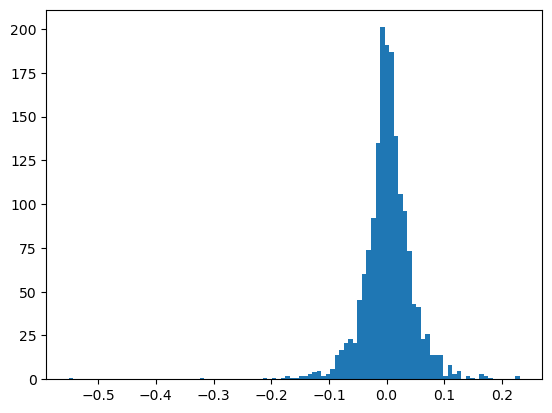

In [52]:
plt.hist(log_ret_daily,bins=100)

plt.show()

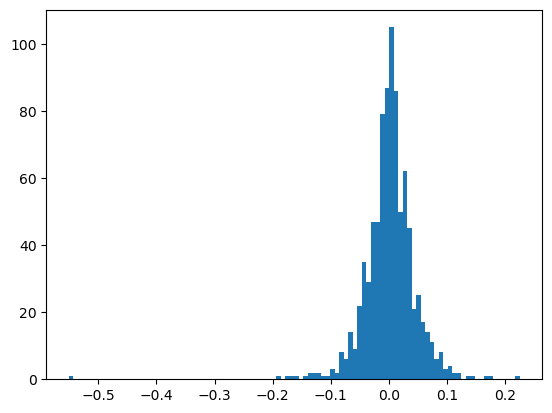

In [66]:
plt.hist(log_ret_2day,bins=100)

plt.show()